In [1]:
from sklearn import svm
import numpy as np
import csv
import matplotlib.pyplot as plt


In [2]:
def make_meshgrid(x, y, h = 0.2):
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() -1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, *params)

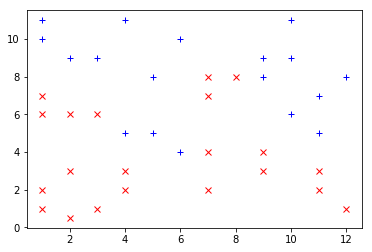

In [5]:
data = list(csv.reader(open('svm_data_kernel.csv')))
npdata = np.array(data)
floatdata = npdata.astype(np.float)
#train_x = tf.constant(floatdata[:, 0:2])
#train_y = tf.constant(floatdata[:,2])

X = floatdata[:, 0:2]
Y = floatdata[:, 2]
for i in range(len(X)):
    if Y[i] == 1:
        plt.plot(X[i,0], X[i,1], 'b+', label = "POS")
    else:
        plt.plot(X[i,0], X[i,1], 'rx', label = "NEG")

#plt.legend()
plt.show()

In [45]:
#find the optimal plane
clf = svm.SVC(kernel = 'rbf', C = 2)
#find the plane
clf.fit(X, Y)

#weight and bias of the hyperplane
#W = clf.coef_[0]
#bias = clf.intercept_[0]
#xx = np.linspace(0,12)
#from the eqn: w1x1 + w2x2 + b = 0
#therefore , x2 = -b/w2 - x1*w1/w2
#yy = -bias/W[1] - xx * W[0]/W[1] 

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
for i in range(len(X)):
    if Y[i] == 1:
        plt.plot(X[i,0], X[i,1], 'b+', label = "POS")
    else:
        plt.plot(X[i,0], X[i,1], 'rx', label = "NEG")


No. of points1
8
8
Class: [-1.]


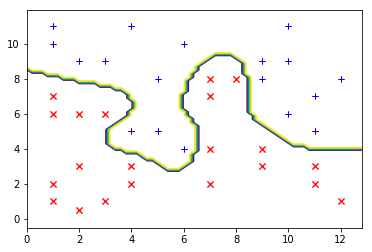

In [47]:
#Lets predict the class of few co-ordinates
n = int(input("No. of points"))
while n > 0:
    a = float(input())
    b = float(input())

    result = clf.predict([[a, b]])
    print("Class:", result)
    xx, yy = make_meshgrid(X[:, 0], X[:, 1])
    for i in range(len(X)):
        if Y[i] == 1:
            plt.plot(X[i,0], X[i,1], 'b+', label = "POS")
        else:
            plt.plot(X[i,0], X[i,1], 'rx', label = "NEG")
    
    plot_contours(plt, clf, xx, yy)
    plt.show()
    n -= 1